## Plot distribution of standardized residuals

GARCH models make distribution assumptions of the standardized residuals. Recall residuals are the differences between predicted returns and the mean returns. And standardized residuals are the residuals divided by the model estimated volatility.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9,8]
import warnings
warnings.filterwarnings('ignore')
from arch import arch_model
from pandas_datareader import DataReader
from datetime import datetime

In [2]:
start = datetime(2010,1,1)
end = datetime(2020,7,10)

sp_price = DataReader('^GSPC', 'yahoo',start, end)
sp_price.drop(columns=['High','Low','Open','Volume','Adj Close'], inplace=True)
sp_price['Return'] = 100*(sp_price['Close'].pct_change())

In [3]:
np.random.seed(4)
normal_resid = np.random.normal(size = sp_price.shape[0])
normal_vol = normal_resid.std()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3205.084544809118
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3197.0285976368095
Iteration:      3,   Func. Count:     31,   Neg. LLF: 3196.476245611289
Iteration:      4,   Func. Count:     39,   Neg. LLF: 3194.6621175317405
Iteration:      5,   Func. Count:     47,   Neg. LLF: 3193.60099809722
Iteration:      6,   Func. Count:     55,   Neg. LLF: 3192.570127248819
Iteration:      7,   Func. Count:     63,   Neg. LLF: 3192.46981397248
Iteration:      8,   Func. Count:     72,   Neg. LLF: 3192.449133254695
Iteration:      9,   Func. Count:     80,   Neg. LLF: 3192.4414373369664
Iteration:     10,   Func. Count:     88,   Neg. LLF: 3192.4350769530984
Iteration:     11,   Func. Count:     95,   Neg. LLF: 3192.434664072065
Iteration:     12,   Func. Count:    102,   Neg. LLF: 3192.434654947898
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3192.4346549478987
            Iterations: 

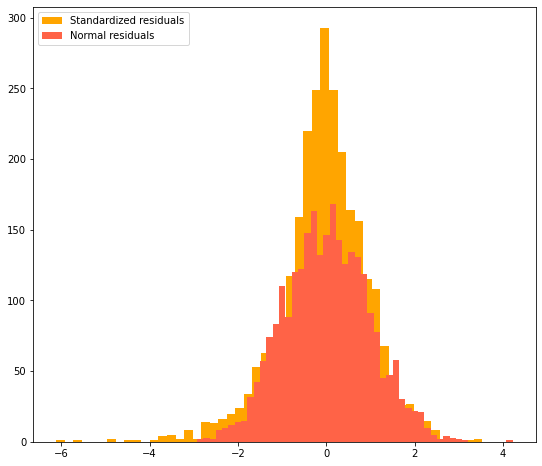

In [4]:
# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_price['Return'].dropna(), p = 1, q = 1, 
                      mean = 'constant', vol = 'GARCH', dist = 't')
# Fit the model
gm_result = basic_gm.fit()

# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.hist(gm_std_resid, bins = 50, 
         facecolor = 'orange', label = 'Standardized residuals')
plt.hist(normal_resid, bins = 50, 
         facecolor = 'tomato', label = 'Normal residuals')
plt.legend(loc = 'upper left')
plt.show()

Compared with a standard normal distribution, the distribution curve of standardized residuals from the GARCH models exhibits more peaks, asymmetry, and has a negative skew

## Fit a GARCH with skewed t-distribution

The default normal distribution assumption of the standardized residuals used in GARCH models are not representative of the real financial world. Fat tails and skewness are frequently observed in financial return data.

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3298.2782910866417
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3289.200092761749
Iteration:      3,   Func. Count:     29,   Neg. LLF: 3284.0539998969552
Iteration:      4,   Func. Count:     37,   Neg. LLF: 3283.6519684083787
Iteration:      5,   Func. Count:     44,   Neg. LLF: 3283.4588156379946
Iteration:      6,   Func. Count:     51,   Neg. LLF: 3283.2995920063404
Iteration:      7,   Func. Count:     57,   Neg. LLF: 3283.217438997437
Iteration:      8,   Func. Count:     63,   Neg. LLF: 3283.2164502097353
Iteration:      9,   Func. Count:     69,   Neg. LLF: 3283.216410543364
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3283.2164105426255
            Iterations: 9
            Function evaluations: 69
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      8,   Neg. LLF: 3205.0845480453713
Iteration:      2,   Func. Count:     22,   Neg. LLF: 3196.99999

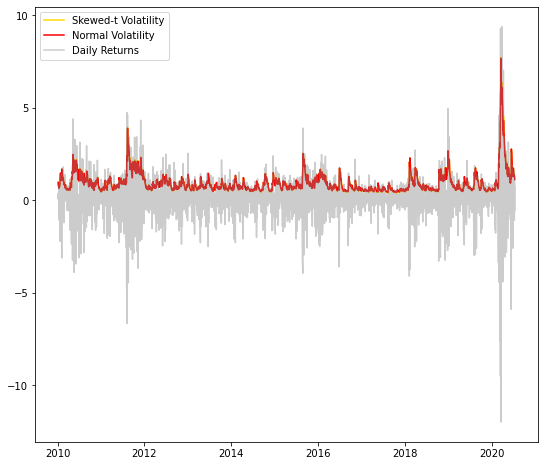

In [5]:
# Specify a GARCH(1,1) model
normal_gm = arch_model(sp_price['Return'].dropna(), p = 1, q = 1, 
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

# Fit the model
normal_result = normal_gm.fit()

# Get model estimated volatility
normal_vol = normal_result.conditional_volatility

# Specify GARCH model assumptions
skewt_gm = arch_model(sp_price['Return'].dropna(), p = 1, q = 1, 
                      mean = 'constant', vol = 'GARCH', dist = 'skewt')

# Fit the model
skewt_result = skewt_gm.fit()

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

# Plot model fitting results
plt.plot(skewt_vol, color = 'gold', label = 'Skewed-t Volatility')
plt.plot(normal_vol, color = 'red', label = 'Normal Volatility')
plt.plot(sp_price['Return'], color = 'grey',label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper left')
plt.show()

With skewed Student’s t-distribution assumption, GARCH model estimation is more in line with the actual observations.

## Effect of mean model on volatility predictions

In practice, returns and volatility are modeled in separate processes. Typically the mean assumptions influence predicted returns, but have a minor effect on the volatility estimations.

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3298.2782910866417
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3289.200092761749
Iteration:      3,   Func. Count:     29,   Neg. LLF: 3284.0539998969552
Iteration:      4,   Func. Count:     37,   Neg. LLF: 3283.6519684083787
Iteration:      5,   Func. Count:     44,   Neg. LLF: 3283.4588156379946
Iteration:      6,   Func. Count:     51,   Neg. LLF: 3283.2995920063404
Iteration:      7,   Func. Count:     57,   Neg. LLF: 3283.217438997437
Iteration:      8,   Func. Count:     63,   Neg. LLF: 3283.2164502097353
Iteration:      9,   Func. Count:     69,   Neg. LLF: 3283.216410543364
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3283.2164105426255
            Iterations: 9
            Function evaluations: 69
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3298.2782910866417
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3289.20009

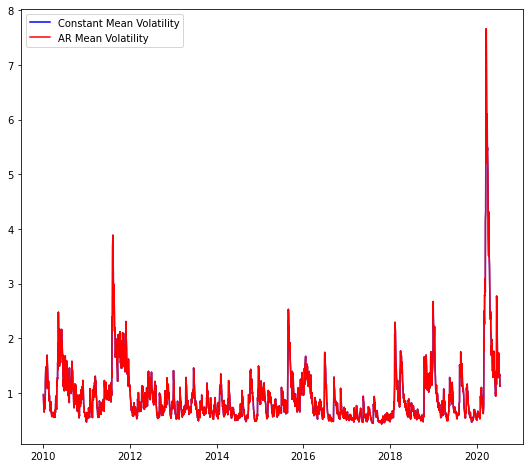

1.0


In [6]:
# Specify a GARCH(1,1) model
cmean_gm = arch_model(sp_price['Return'].dropna(), p = 1, q = 1, 
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

# Fit the model
cmean_result = cmean_gm.fit()

# Get model estimated volatility
cmean_vol = cmean_result.conditional_volatility

# Specify a GARCH(1,1) model
armean_gm = arch_model(sp_price['Return'].dropna(), p = 1, q = 1, 
                      mean = 'AR', vol = 'GARCH', dist = 'normal')

# Fit the model
armean_result = armean_gm.fit()

# Get model estimated volatility
armean_vol = armean_result.conditional_volatility

# Print model summary of GARCH with constant mean
print(cmean_result.summary())
# Print model summary of GARCH with AR mean
print(armean_result.summary())

# Plot model volatility 
plt.plot(cmean_vol, color = 'blue', label = 'Constant Mean Volatility')
plt.plot(armean_vol, color = 'red', label = 'AR Mean Volatility')
plt.legend(loc = 'upper left')
plt.show()

# Check correlation of volatility estimations
print(np.corrcoef(cmean_vol, armean_vol)[0,1])

The correlation coefficient is 1, and the plot shows volatility estimation from both models are very close. In fact, the impact of the mean model assumptions on volatility estimation is so small that, if the interest is only in the volatility dynamics, usually one can just assume the most simple specification, namely the constant mean model.

## Fit GARCH models to cryptocurrency

Financial markets tend to react to positive and negative news shocks very differently, and one example is the dramatic swings observed in the cryptocurrency market in recent years.

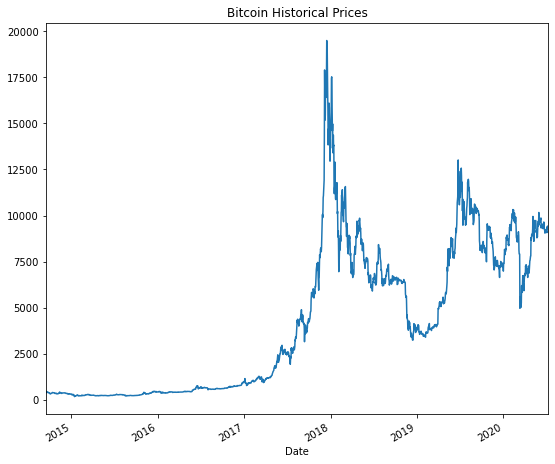

In [7]:
bitcoin = DataReader('BTC-USD', 'yahoo',start, end)
bitcoin.drop(columns=['High','Low','Open','Volume','Adj Close'], inplace=True)
bitcoin['Return'] = 100*(sp_price['Close'].pct_change())
bitcoin['Close'].plot()
plt.title('Bitcoin Historical Prices')
plt.show()

In [8]:
# Specify model assumptions
gjr_gm = arch_model(bitcoin['Return'].dropna(), p = 1, q = 1, o = 1, vol = 'GARCH', dist = 't')

# Fit the model
gjrgm_result = gjr_gm.fit(disp = 'off')

# Get model estimated volatility
gjrgm_vol = gjrgm_result.conditional_volatility

# Print model fitting summary
print(gjrgm_result.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                       Return   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -1665.63
Distribution:      Standardized Student's t   AIC:                           3343.26
Method:                  Maximum Likelihood   BIC:                           3375.00
                                              No. Observations:                 1465
Date:                      Sun, Jul 12 2020   Df Residuals:                     1459
Time:                              21:48:51   Df Model:                            6
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

In [9]:
# Specify model assumptions
egarch_gm = arch_model(bitcoin['Return'].dropna(), p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')

# Fit the model
egarch_result = egarch_gm.fit(disp = 'off')

# Get model estimated volatility
egarch_vol = egarch_result.conditional_volatility

# Print model fitting summary
print(egarch_result.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                       Return   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                           EGARCH   Log-Likelihood:               -1665.03
Distribution:      Standardized Student's t   AIC:                           3342.06
Method:                  Maximum Likelihood   BIC:                           3373.79
                                              No. Observations:                 1465
Date:                      Sun, Jul 12 2020   Df Residuals:                     1459
Time:                              21:48:51   Df Model:                            6
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

## Compare GJR-GARCH with EGARCH

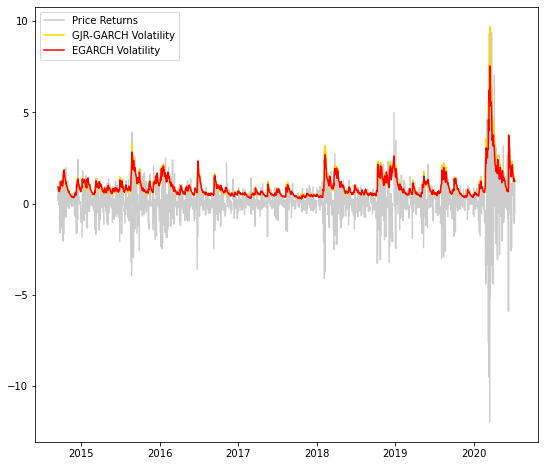

In [10]:
# Plot the actual Bitcoin returns
plt.plot(bitcoin['Return'], color = 'grey', alpha = 0.4, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = 'gold', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color = 'red', label = 'EGARCH Volatility')

plt.legend(loc = 'upper left')

Overall both GJR-GARCH and EGARCH models did a good job of fitting the actual data. Comparatively, GJR-GARCH is more conservative in volatility estimation when applying it to the Bitcoin dataset.

Iteration:      5,   Func. Count:     41,   Neg. LLF: 220.42497433189232
Iteration:     10,   Func. Count:     79,   Neg. LLF: 220.07073476634463
Iteration:     15,   Func. Count:    114,   Neg. LLF: 220.07004765704937
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 220.07002855678573
            Iterations: 17
            Function evaluations: 128
            Gradient evaluations: 17
Iteration:      5,   Func. Count:     41,   Neg. LLF: 221.7226557180823
Iteration:     10,   Func. Count:     78,   Neg. LLF: 221.3704081201344
Iteration:     15,   Func. Count:    113,   Neg. LLF: 221.36967398939834
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 221.3695505708766
            Iterations: 17
            Function evaluations: 128
            Gradient evaluations: 17
Iteration:      5,   Func. Count:     41,   Neg. LLF: 222.58246694138887
Iteration:     10,   Func. Count:     78,   Neg. LLF: 222.2362806150

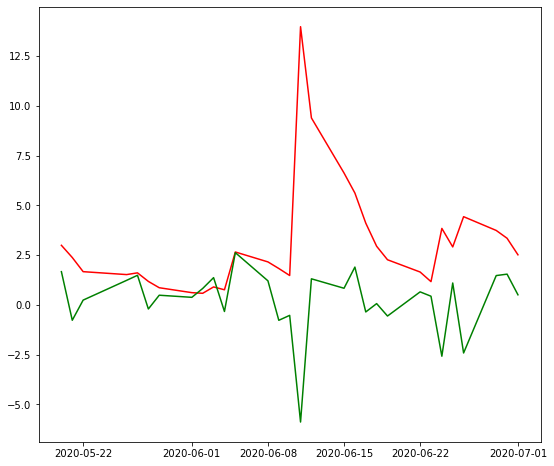

In [11]:
start_loc = 2491
end_loc = 2611
forecasts = {}
for i in range(30):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(first_obs = i + start_loc, 
                             last_obs = i + end_loc, update_freq = 5)
    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast
# Save all forecast to a dataframe    
forecast_var = pd.DataFrame(forecasts).T

# Plot the forecast variance
plt.plot(forecast_var, color = 'red')
plt.plot(sp_price.Return['2020-5-20':'2020-7-1'], color = 'green')
plt.show()

In [12]:
sp_price.iloc[end_loc]

Close     2922.939941
Return      -1.048440
Name: 2020-05-19 00:00:00, dtype: float64